In [3]:
import numpy as np
from metasense.data import load_board
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from nonconformist.cp import IcpRegressor
from nonconformist.nc import NcFactory
sns.set_style('white')

In [41]:
(X_train, Y_train), (X_test, Y_test) = load_board(4)

# Example of corrected voltages

In [76]:
X_train.shape[0] + X_test.shape[0]

80123

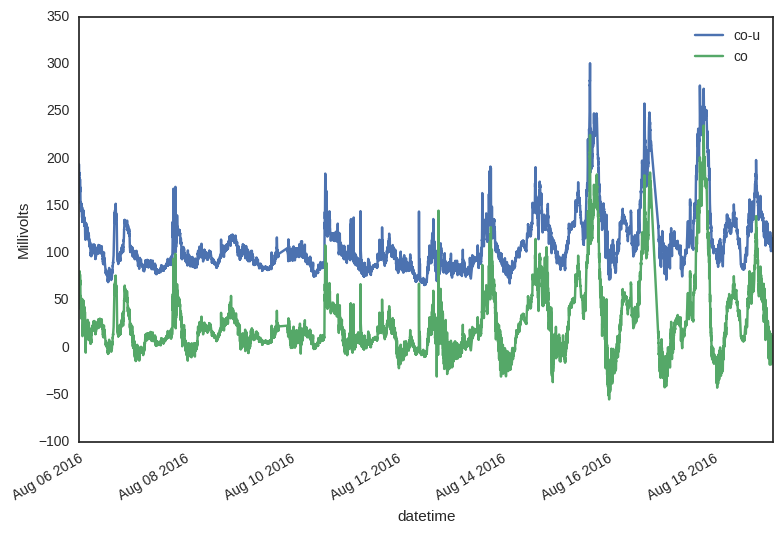

In [22]:
X_train[['co-u', 'co']].plot(label=['Uncorrected', 'Corrected'])
plt.ylabel('Millivolts')
plt.tight_layout()
plt.show()

## Corrections results

In [6]:
Y_columns = ['epa-co', 'epa-no2', 'epa-o3']
def train_classifier(cf, columns):
    X, Y = X_train[columns], Y_train[Y_columns]
    X_, Y_ = X_test[columns], Y_test[Y_columns]
    cf.fit(X_train[columns], Y_train[Y_columns])
    Y_pred = cf.predict(X_)
    return {g: np.sqrt(mean_squared_error(Y_["epa-%s" % g], Y_pred[:, i])) for i, g in enumerate(['co', 'no2', 'o3'])}

### Corrected

In [48]:
train_classifier(LinearRegression(), ['co', 'no2', 'o3'])

{'co': 0.12890737641594621,
 'no2': 8.1917410985246928,
 'o3': 10.128155768501594}

In [81]:
train_classifier(make_pipeline(PolynomialFeatures(2), LinearRegression()), ['co', 'no2', 'o3'])

{'co': 0.12364165351228058, 'no2': 8.2188059414113699, 'o3': 10.12406066413849}

### Uncorrected

In [71]:
train_classifier(LinearRegression(), ['co-u', 'no2-u', 'o3-u'])

{'co': 0.12353776341574318,
 'no2': 7.7948215661598192,
 'o3': 10.312066518476993}

In [73]:
train_classifier(make_pipeline(PolynomialFeatures(2), LinearRegression()), ['co-u', 'no2-u', 'o3-u'])

{'co': 0.12334064994591616,
 'no2': 8.0915484294891797,
 'o3': 10.188822028373476}

# Environment variables

### With environment variables

In [85]:
train_classifier(LinearRegression(), ['co-u', 'no2-u', 'o3-u', 'temperature', 'humidity', 'pressure'])

{'co': 0.12718980575769917,
 'no2': 6.7619077239409338,
 'o3': 8.8475417406817467}

In [88]:
train_classifier(make_pipeline(PolynomialFeatures(2), LinearRegression()), ['co-u', 'no2-u', 'o3-u', 'temperature', 'humidity', 'pressure'])

{'co': 0.12235233070126415,
 'no2': 7.3951854511098913,
 'o3': 17.245925443704891}

### Without environment variables

In [90]:
train_classifier(LinearRegression(), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12353776341574318,
 'no2': 7.7948215661598192,
 'o3': 10.312066518476993}

In [91]:
train_classifier(make_pipeline(PolynomialFeatures(2), LinearRegression()), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12334064994591616,
 'no2': 8.0915484294891797,
 'o3': 10.188822028373476}

# Non-linear models

In [92]:
train_classifier(LinearRegression(), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12353776341574318,
 'no2': 7.7948215661598192,
 'o3': 10.312066518476993}

In [93]:
train_classifier(make_pipeline(PolynomialFeatures(2), LinearRegression()), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12334064994591616,
 'no2': 8.0915484294891797,
 'o3': 10.188822028373476}

In [97]:
train_classifier(DecisionTreeRegressor(max_depth=2), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.14377771463492478,
 'no2': 8.8909724775858709,
 'o3': 15.071300546623364}

In [99]:
train_classifier(DecisionTreeRegressor(max_depth=3), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.1445592874072828, 'no2': 9.0027716981011192, 'o3': 13.015970191565374}

In [100]:
train_classifier(DecisionTreeRegressor(max_depth=5), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12928476838217812,
 'no2': 8.2579705532902228,
 'o3': 11.078508174024694}

In [102]:
train_classifier(DecisionTreeRegressor(max_depth=10), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.13270873735507857,
 'no2': 8.2401643226490187,
 'o3': 10.676641512289383}

In [105]:
train_classifier(DecisionTreeRegressor(max_depth=15), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.14850017180009076,
 'no2': 8.7623700824163127,
 'o3': 11.565024565264562}

In [106]:
train_classifier(RandomForestRegressor(10, max_depth=3), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.13838155056504584,
 'no2': 8.8269625428253669,
 'o3': 12.727192019397295}

In [111]:
train_classifier(RandomForestRegressor(50, max_depth=3), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.14061035269927666,
 'no2': 8.8625537462022166,
 'o3': 12.664084369924108}

In [113]:
train_classifier(RandomForestRegressor(100, max_depth=3), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.1397101001753222, 'no2': 8.8408478754640552, 'o3': 12.654336025554324}

In [119]:
train_classifier(RandomForestRegressor(100, max_depth=5), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12699385911427727,
 'no2': 8.1879999563995138,
 'o3': 10.486709327500055}

In [121]:
train_classifier(RandomForestRegressor(100, max_depth=10), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.1276176253375203, 'no2': 8.0239991898653216, 'o3': 9.8957247794161951}

In [127]:
train_classifier(MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10, max_depth=3)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.13891860689853161,
 'no2': 8.8312643062291674,
 'o3': 12.780707461526228}

In [128]:
train_classifier(MultiOutputRegressor(GradientBoostingRegressor(n_estimators=50, max_depth=3)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12507917969002061,
 'no2': 7.8981894587299903,
 'o3': 9.8125052692741015}

In [129]:
train_classifier(MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, max_depth=3)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.12546073794717999,
 'no2': 7.9843568241791356,
 'o3': 9.6994941141910687}

In [130]:
train_classifier(MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, max_depth=5)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.13003814688199217,
 'no2': 8.0652900701030283,
 'o3': 9.7268291533331563}

In [132]:
train_classifier(MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, max_depth=10)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.13653536207395825,
 'no2': 8.1110660891773545,
 'o3': 10.032021862010359}

In [142]:
train_classifier(MLPRegressor((100, 100)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.24520478752131661,
 'no2': 8.2597778016066563,
 'o3': 9.9090360491363949}

In [143]:
train_classifier(MLPRegressor((200, 200)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.35190733919970363,
 'no2': 8.5573462354141192,
 'o3': 9.7861381791153406}

In [144]:
train_classifier(MLPRegressor((100, 100, 100, 100)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.19121203503297213, 'no2': 7.7738590655928483, 'o3': 9.898342568046731}

In [145]:
train_classifier(MLPRegressor((200, 200, 200, 200)), ['co-u', 'no2-u', 'o3-u',])

{'co': 0.20217864179388553,
 'no2': 7.8145428742301339,
 'o3': 10.012625214358211}

# Conformal regression

In [7]:
Y_columns = ['epa-co', 'epa-no2', 'epa-o3']
def train_classifier(cf, columns):
    X, Y = X_train[columns].as_matrix(), Y_train[Y_columns].as_matrix()
    X_, Y_ = X_test[columns], Y_test[Y_columns]
    X, X_valid, Y, y_valid = train_test_split(X, Y)
    results = {}
    for i, g in enumerate(['co', 'no2', 'o3']):
        
        cf.fit(X, Y[:, i])
        cf.calibrate(X_valid, y_valid[:, i])
        #from IPython.core.debugger import set_trace; set_trace()
        Y_pred = cf.predict(X_.as_matrix(), significance=0.05)
        results[g] = Y_pred
    return results

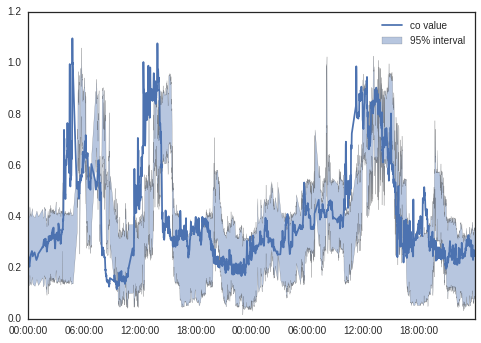

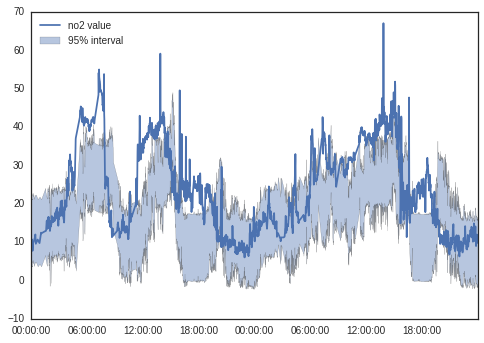

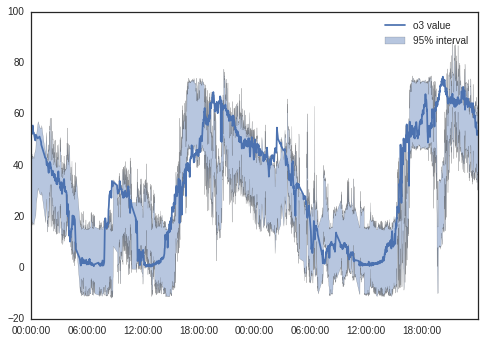

In [83]:
model = RandomForestRegressor(100, max_depth=10)
nc = NcFactory.create_nc(model)
icp = IcpRegressor(nc)
results = train_classifier(icp, ['co-u', 'no2-u', 'o3-u',])
for g in ['co', 'no2', 'o3']:
    X_test['%s-lower-linear'%g] = results[g][:, 0]
    X_test['%s-upper-linear'%g] = results[g][:, 1]
for g in ['co', 'no2', 'o3']:
    plt.figure()
    data, test_data = X_test["09-28-2016":"09-29-2016"], Y_test["09-28-2016":"09-29-2016"]
    plt.fill_between(data.index.values, data['%s-lower-linear'%g], data['%s-upper-linear'%g], alpha=0.4, label='95% interval')
    plt.plot(data.index.values, test_data['epa-%s'%g], label='%s value'%g)
    plt.legend(loc='best')
plt.show()

# Oversampled data

In [4]:
(X_train, Y_train), (X_test, Y_test) = load_board(12)

In [8]:
X_train.shape[0] + X_test.shape[0]

961309

In [9]:
train_classifier(LinearRegression(), ['co-u', 'no2-u', 'o3-u'])

{'co': 0.1255841047701593, 'no2': 7.9375514100042706, 'o3': 12.325263412621521}

In [11]:
train_classifier(make_pipeline(PolynomialFeatures(2), LinearRegression()), ['co-u', 'no2-u', 'o3-u'])

{'co': 0.12508256761666781,
 'no2': 8.1400464137787658,
 'o3': 12.172954165087797}

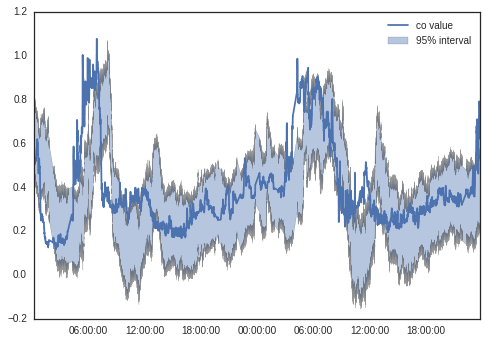

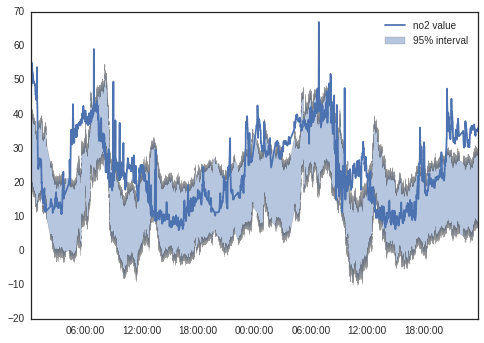

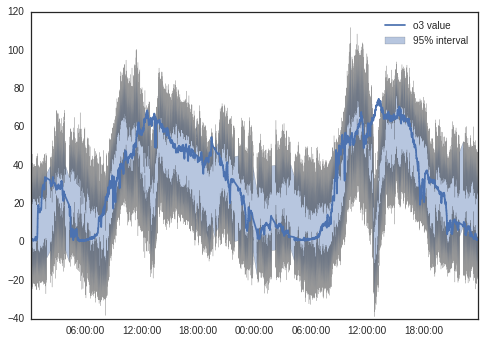

In [8]:
model = LinearRegression()
nc = NcFactory.create_nc(model)
icp = IcpRegressor(nc)
results = train_classifier(icp, ['co-u', 'no2-u', 'o3-u',])
for g in ['co', 'no2', 'o3']:
    X_test['%s-lower-linear'%g] = results[g][:, 0]
    X_test['%s-upper-linear'%g] = results[g][:, 1]
for g in ['co', 'no2', 'o3']:
    plt.figure()
    data, test_data = X_test["09-28-2016":"09-29-2016"], Y_test["09-28-2016":"09-29-2016"]
    plt.fill_between(data.index.values, data['%s-lower-linear'%g], data['%s-upper-linear'%g], alpha=0.4, label='95% interval')
    plt.plot(data.index.values, test_data['epa-%s'%g], label='%s value'%g)
    plt.legend(loc='best')
plt.show()